# Computing probabilities from a normal curve
This little tutorial is designed to help you understand how to calculate probabilities from a normal distribution. First (as is often the case) we import some useful packages that other really smart people wrote for us :)

In [2]:
# Import some useful python packages
import numpy as np # for math
import matplotlib.pyplot as plt # for plotting capabilities
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Remember that the equation for a normal probability density function is given by

$p(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[-\frac{\left(x-x_0\right)^2}{2\sigma^2}\right]$

where $x_0$ is the mean of the distribution and $\sigma$ is the standard deviation.

In order to make our lives easier, let's create a function that can easily create a normal curve given values of the independent variable, the mean, and the standard deviation of the curve. 

In [3]:
def normal_curve(x,mu,sig):
    p = 1/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu)**2/(2*sig**2))
    return p

Now let's take a look at the shape of a normal curves by playing around with the parameters

In [4]:
# Define parameters and a vector of x values
x = np.linspace(-20,40,1000)
mu = 10.5
sig = 3.3

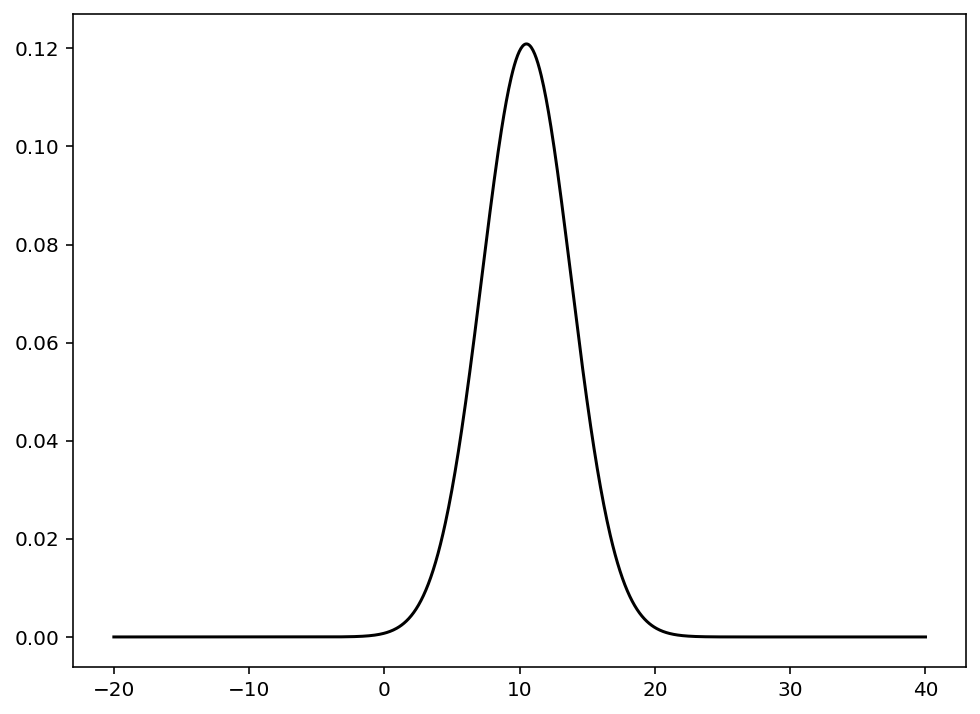

In [5]:
plt.figure(1,figsize=(8,6))
plt.plot(x,normal_curve(x,mu,sig),'-k')

We know, since the normal curve is a PDF, that the area under the curve is equal to exactly 1. However, the question we want to ask ourselves is what fraction of the area under the curve exists between to specified points on the $x$ axis?

Let's set up a plot to visualize what we are after...

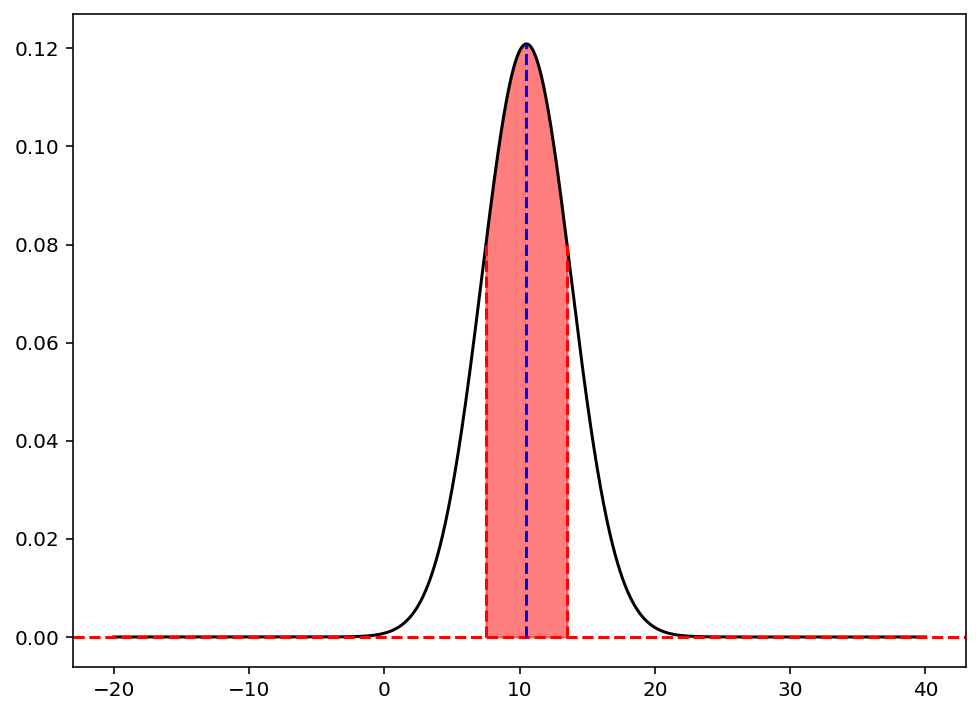

In [6]:
dx = 3
x0 = mu - dx
x1 = mu + dx
plt.figure(2,figsize=(8,6))
plt.plot(x,normal_curve(x,mu,sig),'-k')
plt.axhline(y=0,linestyle='--',color='r')
ymin,ymax = plt.ylim()
plt.plot([x0,x0],[0,normal_curve(x0,mu,sig)],linestyle='--',color='red')
plt.plot([x1,x1],[0,normal_curve(x1,mu,sig)],linestyle='--',color='red')
plt.plot([mu,mu],[0,normal_curve(mu,mu,sig)],linestyle='--',color='blue')

# Create a plot fill
xfill = np.linspace(x0,x1,100)
top = normal_curve(xfill,mu,sig)
bottom = np.zeros(100)
plt.fill_between(xfill,top,bottom,color='red',alpha=0.5)

The way we find the area under a normal curve is by using the "error function." The error function is defined as
$$ \textrm{erf}\, x = \frac{1}{\sqrt{\pi}}\int_{-x}^x e^{-t^2}dt$$
Because of the symmetry of the normal curve, this integral cal also be expressed as:
$$ \textrm{erf}\, x = \frac{2}{\sqrt{\pi}}\int_{0}^x e^{-t^2}dt$$

Because our limits are set up symmetrically, the evaluation of the area is relatively straightforward. But first let's make sure that the total area under the curve is equal to 1.

In [7]:
from scipy.special import erf
erf(np.inf)

1.0

Ok, That works out! So let's try to find the area below the normal curve from plus and minus 3 around the mean. Because of the way the error function is defined (notice that the standard deviation is $\frac{1}{\sqrt{2}}$), we have to be clever about how we evaluate this function

In [8]:
# How many standard deviations away from the mean is the limit?
nsig = dx/sig
# Reormalize argument to account for extra factor of square root of 2
corr = 1./np.sqrt(2)
arg = nsig*corr
area = erf(arg)
print('Area under the curve is: %.4f'%area)

Area under the curve is: 0.6367


What if we want to find the area under the curve on one side of the normal curve from the mean?

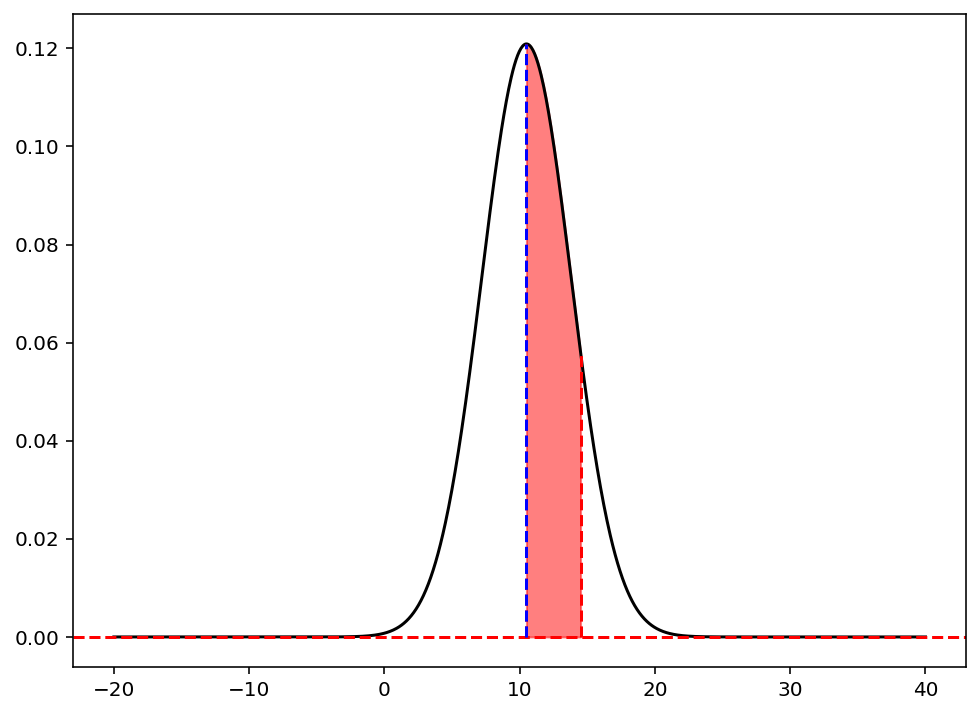

In [9]:
dx = 4
x0 = mu
x1 = mu + dx
plt.figure(3,figsize=(8,6))
plt.plot(x,normal_curve(x,mu,sig),'-k')
plt.axhline(y=0,linestyle='--',color='r')
ymin,ymax = plt.ylim()
plt.plot([x0,x0],[0,normal_curve(x0,mu,sig)],linestyle='--',color='red')
plt.plot([x1,x1],[0,normal_curve(x1,mu,sig)],linestyle='--',color='red')
plt.plot([mu,mu],[0,normal_curve(mu,mu,sig)],linestyle='--',color='blue')

# Create a plot fill
xfill = np.linspace(x0,x1,100)
top = normal_curve(xfill,mu,sig)
bottom = np.zeros(100)
plt.fill_between(xfill,top,bottom,color='red',alpha=0.5)

In [10]:
nsig = dx/sig
nsig

1.2121212121212122

In [11]:
# How many standard deviations away from the mean is the limit?
nsig = dx/sig
# Renormalize argument to account for extra factor of square root of 2
corr = 1./np.sqrt(2)
arg = nsig*corr
area = erf(arg)*0.5
print('Area under the curve is: %.4f'%area)

Area under the curve is: 0.3873


Why does this work?

## Homework
Now that you are familiar with the way these functions work, your task will be to
1. Define an asymmetric interval around the mean of a custom normal curve.
2. Plot the curve and the interval such that you can visualize the area under the curve. 
3. Calculate the area under the curve on this asymmetric interval
4. Save and upload your notebook to the repo

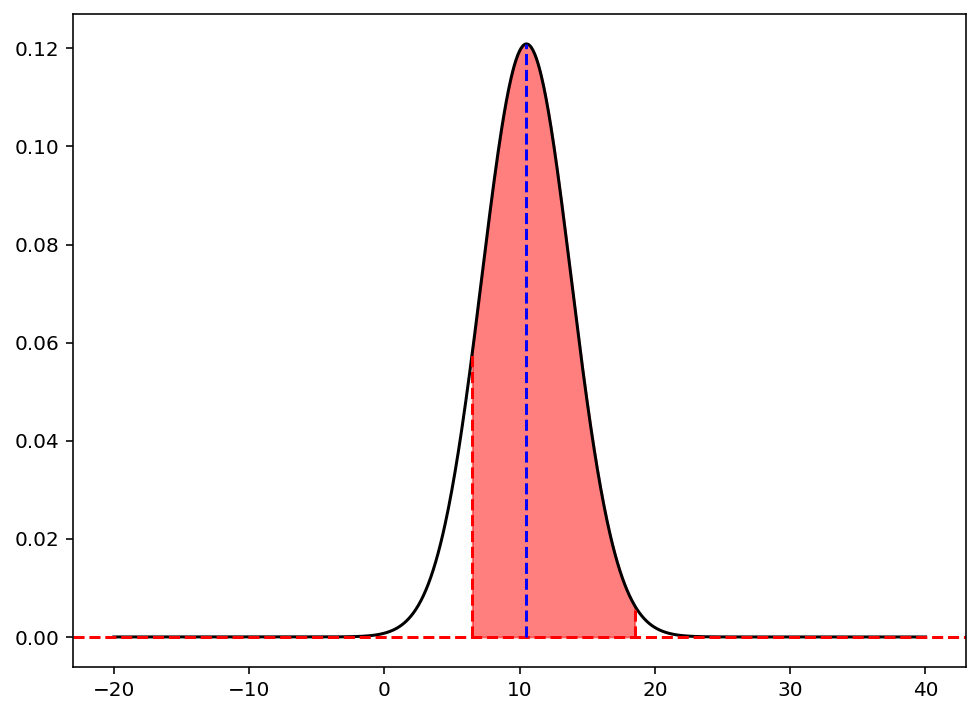

In [12]:
dx = 4
x0 = mu - dx
x1 = mu + 2*dx
plt.figure(3,figsize=(8,6))
plt.plot(x,normal_curve(x,mu,sig),'-k')
plt.axhline(y=0,linestyle='--',color='r')
ymin,ymax = plt.ylim()
plt.plot([x0,x0],[0,normal_curve(x0,mu,sig)],linestyle='--',color='red')
plt.plot([x1,x1],[0,normal_curve(x1,mu,sig)],linestyle='--',color='red')
plt.plot([mu,mu],[0,normal_curve(mu,mu,sig)],linestyle='--',color='blue')

# Create a plot fill
xfill = np.linspace(x0,x1,100)
top = normal_curve(xfill,mu,sig)
bottom = np.zeros(100)
plt.fill_between(xfill,top,bottom,color='red',alpha=0.5)

In [13]:
nsig = dx/sig
nsig

1.2121212121212122

In [15]:
nsig_1 = dx/sig
nsig_2 = 2*dx/sig
corr = 1./np.sqrt(2)
arg_1 = nsig_1*corr
arg_2 = nsig_2*corr
area = erf(arg_1)*0.5 + erf(arg_2)*0.5
print('Area under the curve is: %.4f'%area)

Area under the curve is: 0.8796
